In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import sys

# 1. Stability of the Runge-Kutta method (2 points)

Adapt the boundary locus method to determine the region of absolute stability for the Runge-Kutta method 
$$ U^{n+1}=U^n+kf\left(U^n+\frac{k}{2}f(U^n)\right) $$ 
Plot the region of absolute stability and report whether the method is zero-stable, A-stable, or L-stable.

*Solution*: Consider the test function $u' = \lambda u$, then the iterative step can be written
$$ U^{n+1} = U^n + k\lambda \left( U^n + \frac{k}{2} \lambda U^n \right) = U^n \left(1 + k\lambda + \frac{k^2 \lambda^2}{2} \right) \\ 
U^{n+1} - U^n \left(1 + z + \frac{z^2}{2} \right) = 0 \qquad z = k\lambda$$

So the characteristic polynomial is
$$ \pi(\zeta;z) = \zeta - \left(1 + z + \frac{z^2}{2} \right) $$
which means that the absolute stability region is
$$ |\zeta| = \left|1 + z + \frac{z^2}{2} \right| \leq 1 \\
|(z + 1)^2 + 1| \leq 2 \\
|z+1|^2 \leq 1$$

Consider an arbitrary complex number $z = a + bi$, then the condition is 
$$ |a + 1 + bi|^2 = (a + 1)^2 + b^2 \leq 1 $$

This is a circle centered at $z=-1$ with radius 1, so the method is zero-stable, but not A- or L-stable.

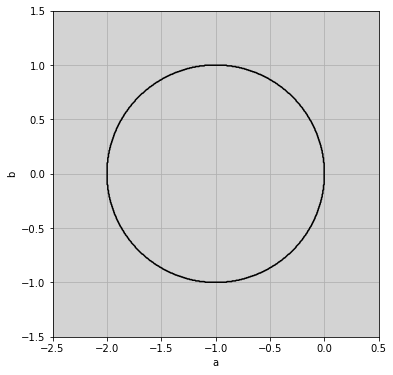

In [54]:
# Used some AI to help with the plotting here
x = np.linspace(-2.5, 0.5, 500)
y = np.linspace(-1.5, 1.5, 500)
X, Y = np.meshgrid(x, y)
region = ((X + 1)**2 + Y**2) <= 1

plt.figure(figsize=(6,6))
plt.contourf(X, Y, region, [0,1], colors=["lightgray"])
# plt.fill(X, Y)
plt.contour(X, Y, region, levels=[0.5], colors=["black"])

plt.gca().set_aspect('equal')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.show()

# 2.  Stability of the TR-BDF2 method (3 points)

The TR--BDF2 method is an implicit 2-stage Runge--Kutta method based ontaking a half time step with the trapezoidal rule and then a half step with the 2-step BDF method:
\begin{align*}
  U^*               & = U^n + \frac{k}{4}(f(U^n)+f(U^*)), \\
  3U^{n+1}-4U^*+U^n & = kf(U^{n+1}).
\end{align*}

1. Show that this method is second-order accurate using Taylor series expansions.
2. Determine the region of absolute stability and plot it. Based on this, show that the method is L-stable.

*Solution*: 

# 3. Stability of the midpoint method (5 points)
A minor variation on the trapezoidal method is the midpoint method:
$$ U^{n+1}=U^n+kf\left(\frac{U^n+U^{n+1}}{2},t_n+\frac{k}{2}\right) $$
        
For constant-coefficient ODEs, this is exactly the same as the trapezoidal method.
1. Show that this method is second-order accurate using Taylor series expansions.
2. Show that this method is A-stable.
3. Show that even if $\lambda$ varies in time, so that
      $$ u'=\lambda(t)u $$
    an analogue of A-stability still holds, i.e., using the midpoint method,
      $$ |U^{n+1}|\leq |U^n| \quad \text{if} \quad \mathbb{R}(\lambda)\leq 0 $$
    This property is called AN-stability.
4. Show that the trapezoidal method, on the other hand, is not AN-stable.

*Solution:* 

# 4. The pizza problem (10 points)

The image below shows a map of the seventh floor of Van Vleck Hall. All the doors are open.
        
A text file called `van_vleck.txt` is provided that encodes thismap as a $73 \times 160$ matrix using 1 for walls and 0 for empty space. Use the convention that $(i,j)=(0,0)$ is the top left of the matrix and $(i,j)=(72,159)$ is the bottom right of the matrix. The grid spacing is $h=22.5\,\text{cm}$.

A student exits the elevator holding a delicious pizza with a strong smell, which covers the region $P$ over gridpoints $(i,j)$ with $36\le i < 40, 44\le j <48$. Let $u(x,y,t)$ be the smell concentration of the pizza at time $t$ at position $\mathbf{v} =(x,y)$. The concentration satisfies the diffusion equation
  $$ \frac{\partial u}{\partial t} = b \nabla^2 u $$
where $b=0.55\,\text{m}^2\,\text{s}^{-1}$. In the region $P$ the field is kept fixed at $u(x,y)=1$. At each wall, the concentration satisfies a no-flux boundary condition,
  $$ \vec{n} \cdot \nabla u =0 $$
where $\vec{n}$ is a unit vector normal to the wall.
        
1. Write a program to solve for the smell concentration field inside the building, using the two-dimensional discretization
    $$ \frac{u_{i,j}^{n+1} - u_{i,j}^n}{k} = b \frac{u_{i+1,j}^n + u_{i,j+1}^n - 4u_{i,j}^n + u_{i-1,j}^n+u_{i,j-1}^n}{h^2} $$
    where $u_{i,j}^n$ is the numerical approximation of $u(jh,(72-i)h,nk)$. Choose the timestep to be $k = \frac{h^2}{6b}$ or smaller. As initial conditions, use
    $$ u_{i,j}^0=\begin{cases}
        1 & \qquad \text{if $(i,j)\in P$,} \\
        0 & \qquad \text{otherwise,}
      \end{cases} $$
    and throughout the simulation, keep $u_{i,j}=1$ for $(i,j)\in P$. To account for the boundary condition, use the
    ghost node approach: when considering a point $(i,j)$ that references an orthogonal neighbor $(i^*,j^*)$ that is a wall, treat $u_{i^*,j^*}^n$ as equal to $u_{i,j}^n$. As an example of this, suppose that at a particular $(i,j)$, the points $(i,j-1)$ and $(i+1,j)$ are within walls. Then, after taking into account the boundary conditions, the appropriate finite-difference relation is
      $$ \frac{u_{i,j}^{n+1} - u_{i,j}^n}{k} = b \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i-1,j}^n}{h^2} = 0 $$
    due to cancellation of some terms.

2. Make two-dimensional plots of the scaled smell concentration field $[u(x,y)]^{1/4}$ at $t=1\,\text{s}, 5\,\text{s}, 25\,\text{s}, 100\,\text{s}$. Here, the quarter power helps to enhance small smell concentrations for visualization purposes. In the program files, there are some example programs that you may find useful, which make plots of a two-dimensional field with the map overlaid. You should expect that your program may take a reasonable amount of wall-clock time, possibly up to ten minutes to simulate to $t=100\,\text{s}$. You may wish test your program over smaller intervals of $t$ and consider possible code optimizations if necessary.

3. Three professors T, Q, and C are trying to work at locations $(31,14)$, $(58,103)$, and $(58,147)$, respectively. Calculate the time in seconds to one decimal place when each professor will be distracted by the pizza smell, defined as when $u$ first exceeds $10^{-4}$ at each location.

4. Make a semilog plot showing the smell concentration at the three professors' locations over the range $0 \le t \le 100\,\text{s}$.

### Part 1